## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил(а): Самоделкина Мария

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [310]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [311]:
def result_mark(weights, marks):
    return sum(weights * marks).round()

In [312]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8.0

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [313]:
def change_array(array, number):
    array[::3] = number
    return array

In [314]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [315]:
def find_close(array1, array2, precision):
    array = np.absolute(array1 - array2) <= precision
    return np.where(array)

In [316]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

(array([0, 1, 3, 6], dtype=int64),)

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [317]:
def block_matrix(block):
    block = np.vstack([block,block])
    return np.hstack([block,block])

In [318]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [319]:
def diag_prod(matrix):
    matrix = np.diag(matrix) 
    mask = matrix != 0
    return np.prod(matrix[mask])

In [320]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [321]:
def normalize(matrix):
    diff = matrix - matrix.mean(0)
    mstd = matrix.std(0)
    return np.divide(diff, mstd, out=np.zeros_like(diff), where=mstd!=0)

In [322]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.70710678, -0.39223227,  0.46291005],
       [-1.41421356,  1.37281295,  0.9258201 ],
       [ 0.70710678, -0.98058068, -1.38873015]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [323]:
def antiderivative(coefs):
    coefs = coefs / np.array(range(1, coefs.size + 1))[::-1]
    return np.append(coefs, 3)

In [324]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([1., 2., 0., 1., 3.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [325]:
def make_symmetric(matrix):
    return matrix.transpose() + matrix - np.diag(np.diag(matrix))

In [326]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [327]:
def construct_matrix(m, a, b):
    return np.tile(np.array(range(a, b + 1)), (m, 1))

In [328]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [329]:
def cosine_similarity(vec1, vec2):
    return sum(vec1 * vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [330]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [331]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [332]:
import matplotlib.pyplot as plt
import pandas as pd

In [333]:
data = pd.read_csv('data.csv', delimiter=',')
print(data.shape)
#891 - размер выборки, 12 признаков

(891, 12)


In [334]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [335]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId - идентификационный признак (для него нельзя составить прогноз) - другое 

Survived - бинарный

Pclass - категориальный (может быть упорядрченным)

Name - идентификационный признак (для него нельзя составить прогноз) - другое

Sex - бинарный

Age - вещественный

SibSp - вещественный

Parch - вещественный

Ticket - идентификационный признак (для него нельзя составить прогноз) - другое

Fare - вещественный

Cabin - идентификационный признак (для него нельзя составить прогноз) - другое

Embarked - категориальный


Задача регрессии: определить по признакам (полу, возрасту, пассажирскому классу) цену на билет у данного человека

Задача классификации: определить выживет или нет человек по признакам (полу, возрасту, пассажирскому классу)

Задача кластеризации: сегментация пассажиров (разбиение на группы схожих объектов). Например, отделить пользоватальей на "типичные классы" по всем существующим признакам, то есть выделить несколько групп, где один человек будет отнесен к одной группе, "типичные" признаки которой будут более точно подходить подописание человека. Разделить пассажиров на группы по признакам (полу, возрасту, пассажирскому классу, цене на билет)

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [336]:
survived = data[data['Survived'] == 1]['Survived'].count()
overall = data['Survived'].count()
survived/overall

0.3838383838383838

In [337]:
data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Survived'].count() /survived

0.31871345029239767

In [338]:
data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Survived'].count() / survived

0.6812865497076024

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [339]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [340]:
print(data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['PassengerId'].count())
print(data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['PassengerId'].count())
#в 3 классе было больше мужчин

347
144


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [341]:
print(data['Fare'].min(), data['Fare'].mean(), data['Fare'].max())
mask = data['Embarked'] == 'S'
print(data[mask]['Fare'].min(), data[mask]['Fare'].mean(), data[mask]['Fare'].max())

0.0 32.2042079685746 512.3292
0.0 27.07981180124218 263.0


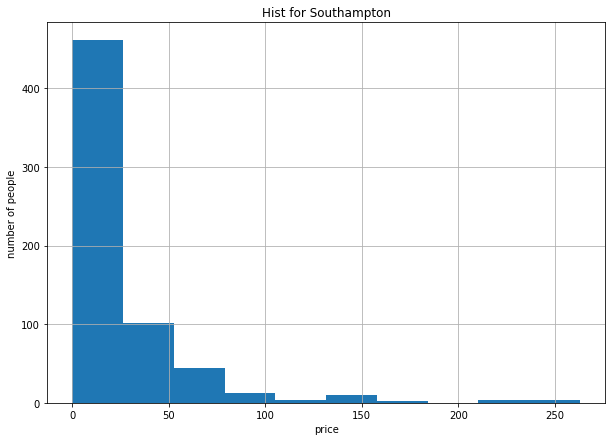

In [342]:
plt.figure(figsize=(10,7))
plt.title('Hist for Southampton')
data[mask]['Fare'].hist()
plt.xlabel('price')
plt.ylabel('number of people')
plt.show()

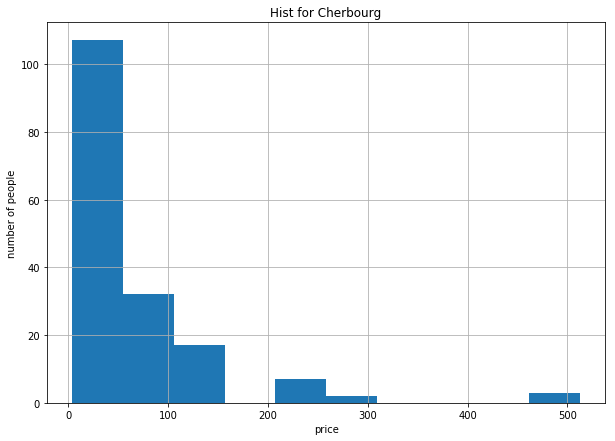

In [343]:
plt.figure(figsize=(10,7))
plt.title('Hist for Cherbourg')
data[data['Embarked'] == 'C']['Fare'].hist()
plt.xlabel('price')
plt.ylabel('number of people')
plt.show()

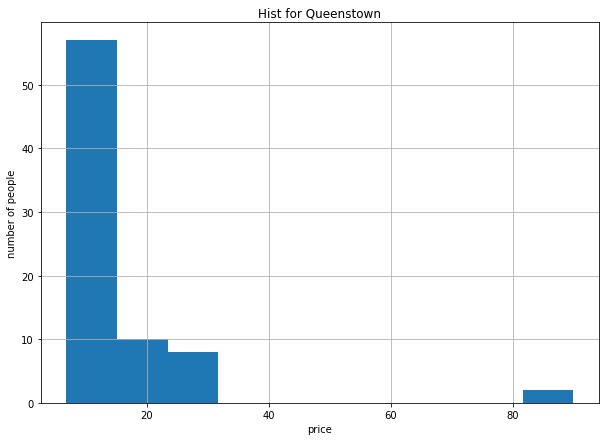

In [344]:
plt.figure(figsize=(10,7))
plt.title('Hist for Queenstown')
data[data['Embarked'] == 'Q']['Fare'].hist()
plt.xlabel('price')
plt.ylabel('number of people')
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [345]:
del data['Ticket'], data['PassengerId']
data.head()
#эти признаки не несут в себе полезной информации, потому что номер билета у всех пассажиров разный
#с помощью этих признаков  нельзя предсказать или проанализировать информацию
#PassengerId не нужен, так как данные нумеруются по умолчанию

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [346]:
data.isnull().sum()
#пропуски есть в столбцах Age (177), Embarked(2), Cabin (687)
#так как мы избаваились от ненужных столбцов, то число пропусков могло уменьшиться

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [347]:
data['Age'].fillna((data['Age'].mean()), inplace=True)
data['Embarked'].fillna('', inplace=True)
data['Cabin'].fillna('', inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [348]:
mask = data['Age'] >= data['Age'].median()
print(data[mask]['Fare'].mean())
print(data[~mask]['Fare'].mean())
print(data['Fare'].mean())
#получили, что чем больше возраст, тем дороже билет

34.47385700197235
29.207561979166652
32.2042079685746


0.09156609328505758


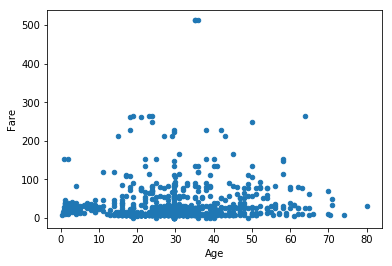

In [349]:
print(data['Age'].corr(data['Fare']))
#корреляция небльшая, величины мало связаны
data.plot.scatter(x='Age', y='Fare')
#на диаграме видно, что люди всех возрастов берут преимущественно менее дорогие билеты

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [350]:
mask = data['Fare'] > data['Fare'].median()
print(data[(mask) & (data['Survived'] == 1)]['Fare'].count() / data[mask]['Fare'].count())
print(data[(~mask) & (data['Survived'] == 1)]['Fare'].count() / data[~mask]['Fare'].count())
#пассажиры с дорогими билетами выживали чаще

0.5180180180180181
0.2505592841163311


In [351]:
print(data['Survived'].corr(data['Pclass']))
#корреляция выживаемости от класса достаточно явная

-0.33848103596101475


In [352]:
data.groupby(['Pclass'])['Survived'].mean()
#пассажиры из 1го класса выживали чаще

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [353]:
data['Relatives'] = pd.Series(data['SibSp'] + data['Parch'] + 1, index=data.index)

#количество соседей в номере
cc = data.groupby('Cabin').count()['Survived']
cc[''] = 0 
data['PplInCabin'] = cc[data['Cabin']].values
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,PplInCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,,S,1,0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [354]:
# Определить зависимость цены от класса
# Корреляция значительная
print(data['Fare'].corr(data['Pclass']))

# зависимость цены от пола
print(data[data['Sex'] == 'female']['Fare'].mean())
print(data[data['Sex'] == 'male']['Fare'].mean())
#мужчины в средем платили меньше

# Корреляция выживаемости от колическтва людей в номере
# Можно проследить закономерность, но данные будут не свосем точными из-за большого колическтва пропусков
print(data['PplInCabin'].corr(data['Survived']))
data.groupby(['PplInCabin'])['Survived'].mean()

-0.5494996199439078
44.47981783439487
25.523893414211418
0.304870307357623


PplInCabin
0    0.299854
1    0.574257
2    0.776316
3    0.733333
4    0.666667
Name: Survived, dtype: float64

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

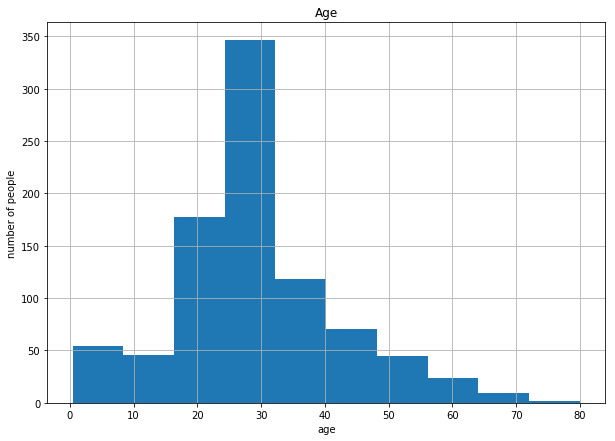

In [355]:
#если не нормировать вещественный признаки, то они будут давать неравноценный вклад в результат
#после нормировки значения признаков будут находиться в одном масштабе
plt.figure(figsize=(10,7))
plt.title('Age')
data['Age'].hist()
plt.xlabel('age')
plt.ylabel('number of people')
plt.show()

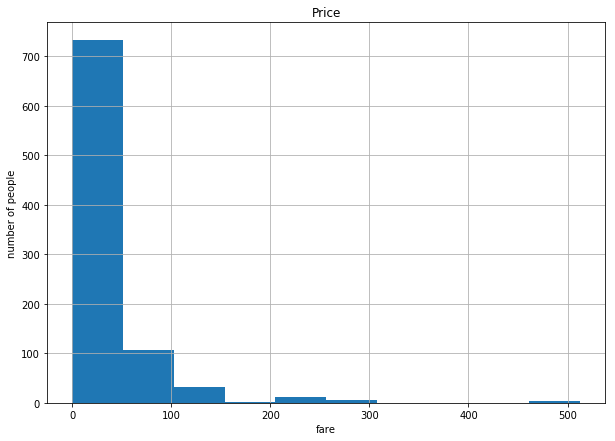

In [356]:
plt.figure(figsize=(10,7))
plt.title('Price')
data['Fare'].hist()
plt.xlabel('fare')
plt.ylabel('number of people')
plt.show()

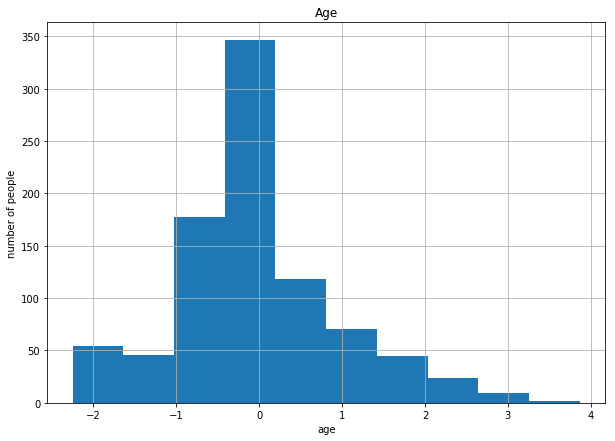

In [357]:
diff = data['Age'] - data['Age'].mean()
mstd = data['Age'].std()
data['Age'] = np.divide(diff, mstd, out=np.zeros_like(diff), where=mstd!=0)
plt.figure(figsize=(10,7))
plt.title('Age')
data['Age'].hist()
plt.xlabel('age')
plt.ylabel('number of people')
plt.show()

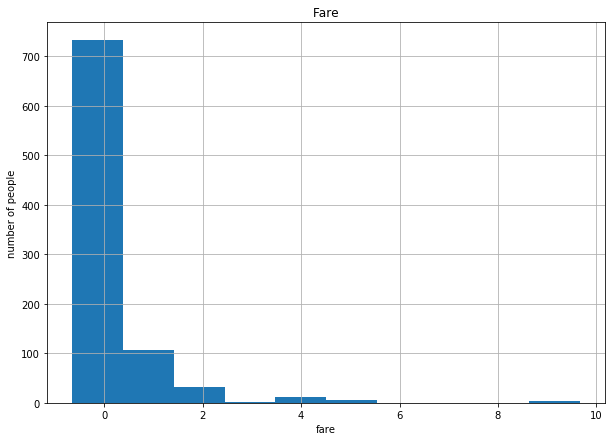

In [358]:
diff = data['Fare'] - data['Fare'].mean()
mstd = data['Fare'].std()
data['Fare'] = np.divide(diff, mstd, out=np.zeros_like(diff), where=mstd!=0)
plt.figure(figsize=(10,7))
plt.title('Fare')
data['Fare'].hist()
plt.xlabel('fare')
plt.ylabel('number of people')
plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [359]:
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q':3})
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,PplInCabin
0,0,3,"Braund, Mr. Owen Harris",0,-0.592148,1,0,-0.502163,,1,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638430,1,0,0.786404,C85,2,2,1
2,1,3,"Heikkinen, Miss. Laina",1,-0.284503,0,0,-0.488580,,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407697,1,0,0.420494,C123,1,2,2
4,0,3,"Allen, Mr. William Henry",0,0.407697,0,0,-0.486064,,1,1,0
